<span style="font-family: 'Bebas Neue'; font-size: 2em;">
MSCS 5610 – Data Mining -Spring 2018 </span>

<span style="font-family: 'Bebas Neue'; font-size: 2em;">
Final Project </span>

<span style="font-family: 'Bebas Neue'; font-size: 1em;">
Project Title :  Auto Selector </span>

<span style="font-family: 'Bebas Neue'; font-size: 1em;">
Team Name:  Team Torque </span>

<span style="font-family: 'Bebas Neue'; font-size: 1em;">
Members : Priyanka Annapureddy, Rani Sebastian, Hsiaoan Wang  </span>

<span style="font-family: 'Bebas Neue'; font-size: 1em;">
Web page : https://github.com/rani009/Team-Torque </span>



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression as LR
%matplotlib inline

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [2]:
#Reading the dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
auto=pd.read_csv(r'C:/Users/Rani/Documents/Marquette/S4/Data Mining/Project/auto-mpg.csv')    
#auto=pd.read_csv(r'C:/Users/Priyanka/Documents/Marquette/DM/Assignments/Project/auto-mpg.csv')

In [3]:
#Checking the variable types
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [4]:
#Horsepower is type 'object', so converting to numeric
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
#Checking for null values
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
#Trying to identify missing values
np.sort(auto.horsepower.unique())

array([  46.,   48.,   49.,   52.,   53.,   54.,   58.,   60.,   61.,
         62.,   63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,
         71.,   72.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
        100.,  102.,  103.,  105.,  107.,  108.,  110.,  112.,  113.,
        115.,  116.,  120.,  122.,  125.,  129.,  130.,  132.,  133.,
        135.,  137.,  138.,  139.,  140.,  142.,  145.,  148.,  149.,
        150.,  152.,  153.,  155.,  158.,  160.,  165.,  167.,  170.,
        175.,  180.,  190.,  193.,  198.,  200.,  208.,  210.,  215.,
        220.,  225.,  230.,   nan])

In [6]:
#Displaying Dataset
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


<span style="font-family: 'Bebas Neue'; font-size: 2em;">
Data Clean Up & Exploratory Data Analysis </span>

In [7]:
#Stats for mpg
auto.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

(0, 40)

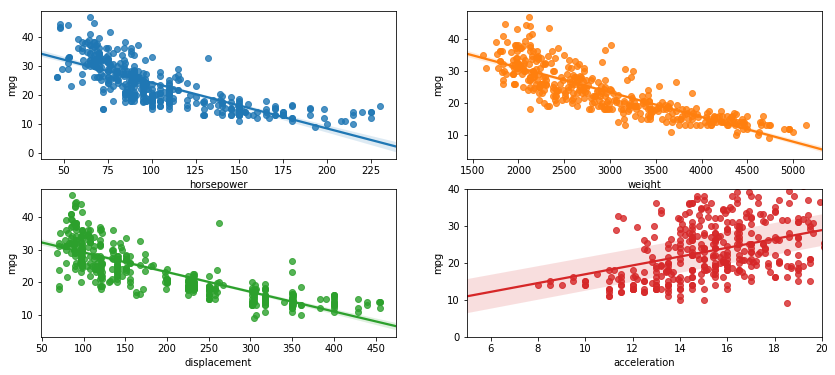

In [8]:
#Code Reference: https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg
#Code Reference: https://www.kaggle.com/pravinwagh/exploratory-data-analysis-auto-mpg
#Code Reference: https://github.com/aCombray/mpg/blob/master/Python_Homework7_YuechengZhu.ipynb
#Exploring mpg's relationship with other variables
fig=plt.figure()
fig,ax=plt.subplots(2,2,figsize=(14,6))
sns.regplot(auto["horsepower"],auto["mpg"],ax=ax[0][0])
sns.regplot(auto["weight"],auto["mpg"],ax=ax[0][1])
sns.regplot(auto["displacement"],auto["mpg"],ax=ax[1][0])
sns.regplot(auto["acceleration"],auto["mpg"],ax=ax[1][1])
plt.xlim(5,20)
plt.ylim(0,40)

In [9]:
#Splitting the brand names for comparison
auto["car name"].unique()
auto["brand"],auto["model"] = auto["car name"].str.split(' ',1).str

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]), <a list of 37 Text xticklabel objects>)

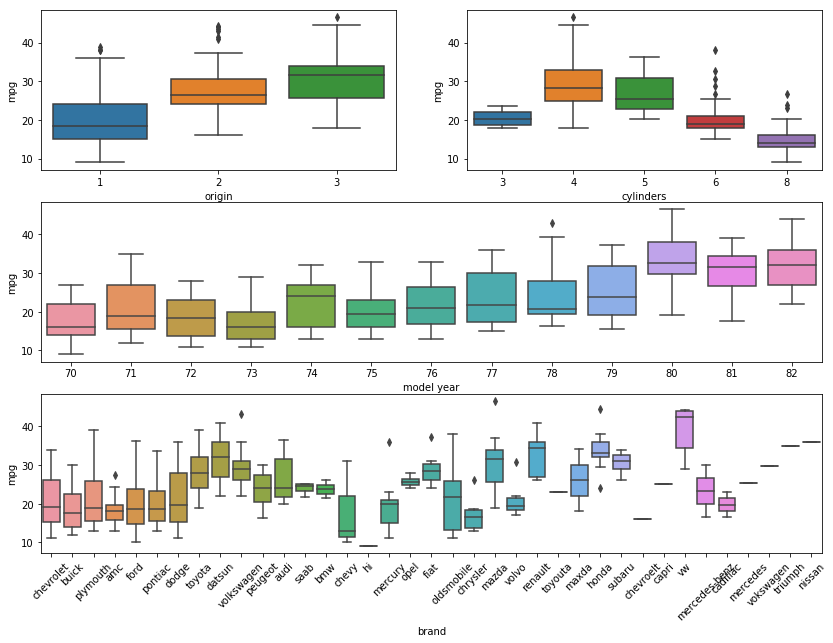

In [10]:
#Box plots of mpg VS other variables
fig=plt.figure()
fig,ax=plt.subplots(figsize=(14,10))
ax1=plt.subplot(321)
ax2=plt.subplot(322)
ax3=plt.subplot(312)
ax4=plt.subplot(313)
sns.boxplot(auto["origin"],auto["mpg"],ax=ax1)
sns.boxplot(auto["cylinders"],auto["mpg"],ax=ax2)
sns.boxplot(auto["brand"],auto["mpg"],ax=ax4)
sns.boxplot(auto["model year"],auto["mpg"],ax=ax3)
plt.xticks(rotation=45)
#plt.savefig("C:/Users/Rani/Documents/Marquette/S4/Data Mining/Project/boxplot.png")

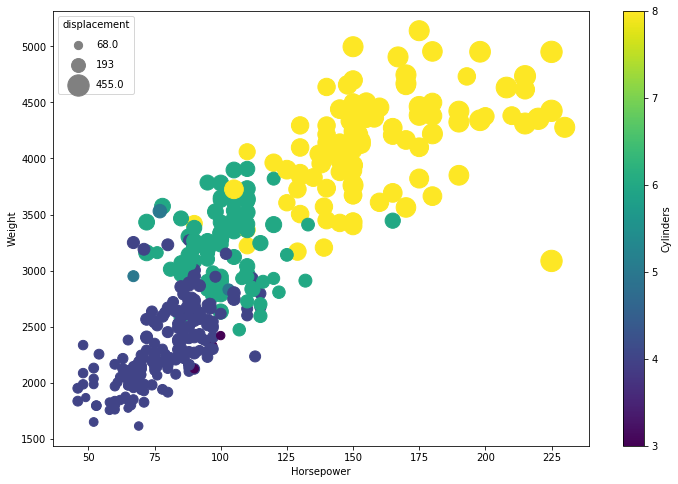

In [11]:
#Exploring the relationship between the variables
plt.figure(figsize=(12,8))
plt.scatter(auto["horsepower"],auto["weight"],c=auto["cylinders"],s=auto["displacement"],label='')

#sns.lmplot("horsepower","weight",data=data,hue="cylinders")
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.colorbar(label="Cylinders")
dpl=[np.min(auto["displacement"]),np.mean(auto["displacement"]),np.max(auto["displacement"])]
for i in dpl:
    plt.scatter([],[],marker='o',c='grey',s=i,label=round(i))
    plt.legend(labelspacing=1,title="displacement")

In [12]:
#Using linear regression to impute missing values of horsepower since there is a clear linear relationship
weight=auto.loc[~auto["horsepower"].isnull(),"weight"].values.reshape(-1,1)
hp=auto.loc[~auto["horsepower"].isnull(),"horsepower"].values.reshape(-1,1)
lr=LR()
lr.fit(weight,hp)
values=lr.predict(auto.loc[auto["horsepower"].isnull(),"weight"].values.reshape(-1,1)).flatten()
lst=auto["horsepower"].isnull()
lst=np.array(lst[lst].index)
for i,j in zip(lst,values):
  auto.loc[i,"horsepower"]=j

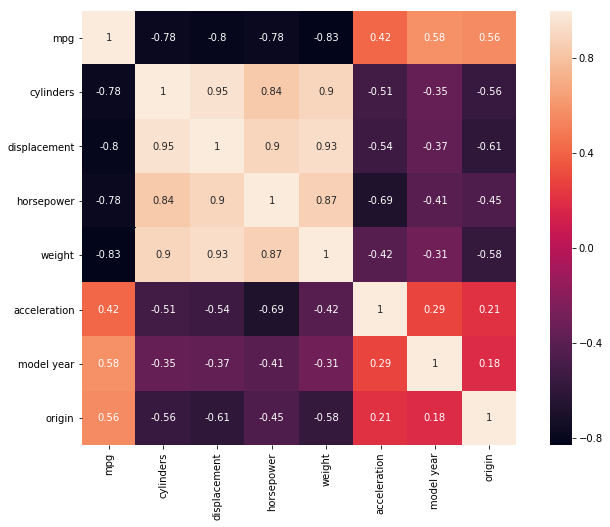

In [13]:
#Plotting a Heat Map
plt.figure(figsize=(12,8))
corr=auto.corr()
sns.heatmap(corr,square=True, annot=True)

C:\Users\Rani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\Rani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


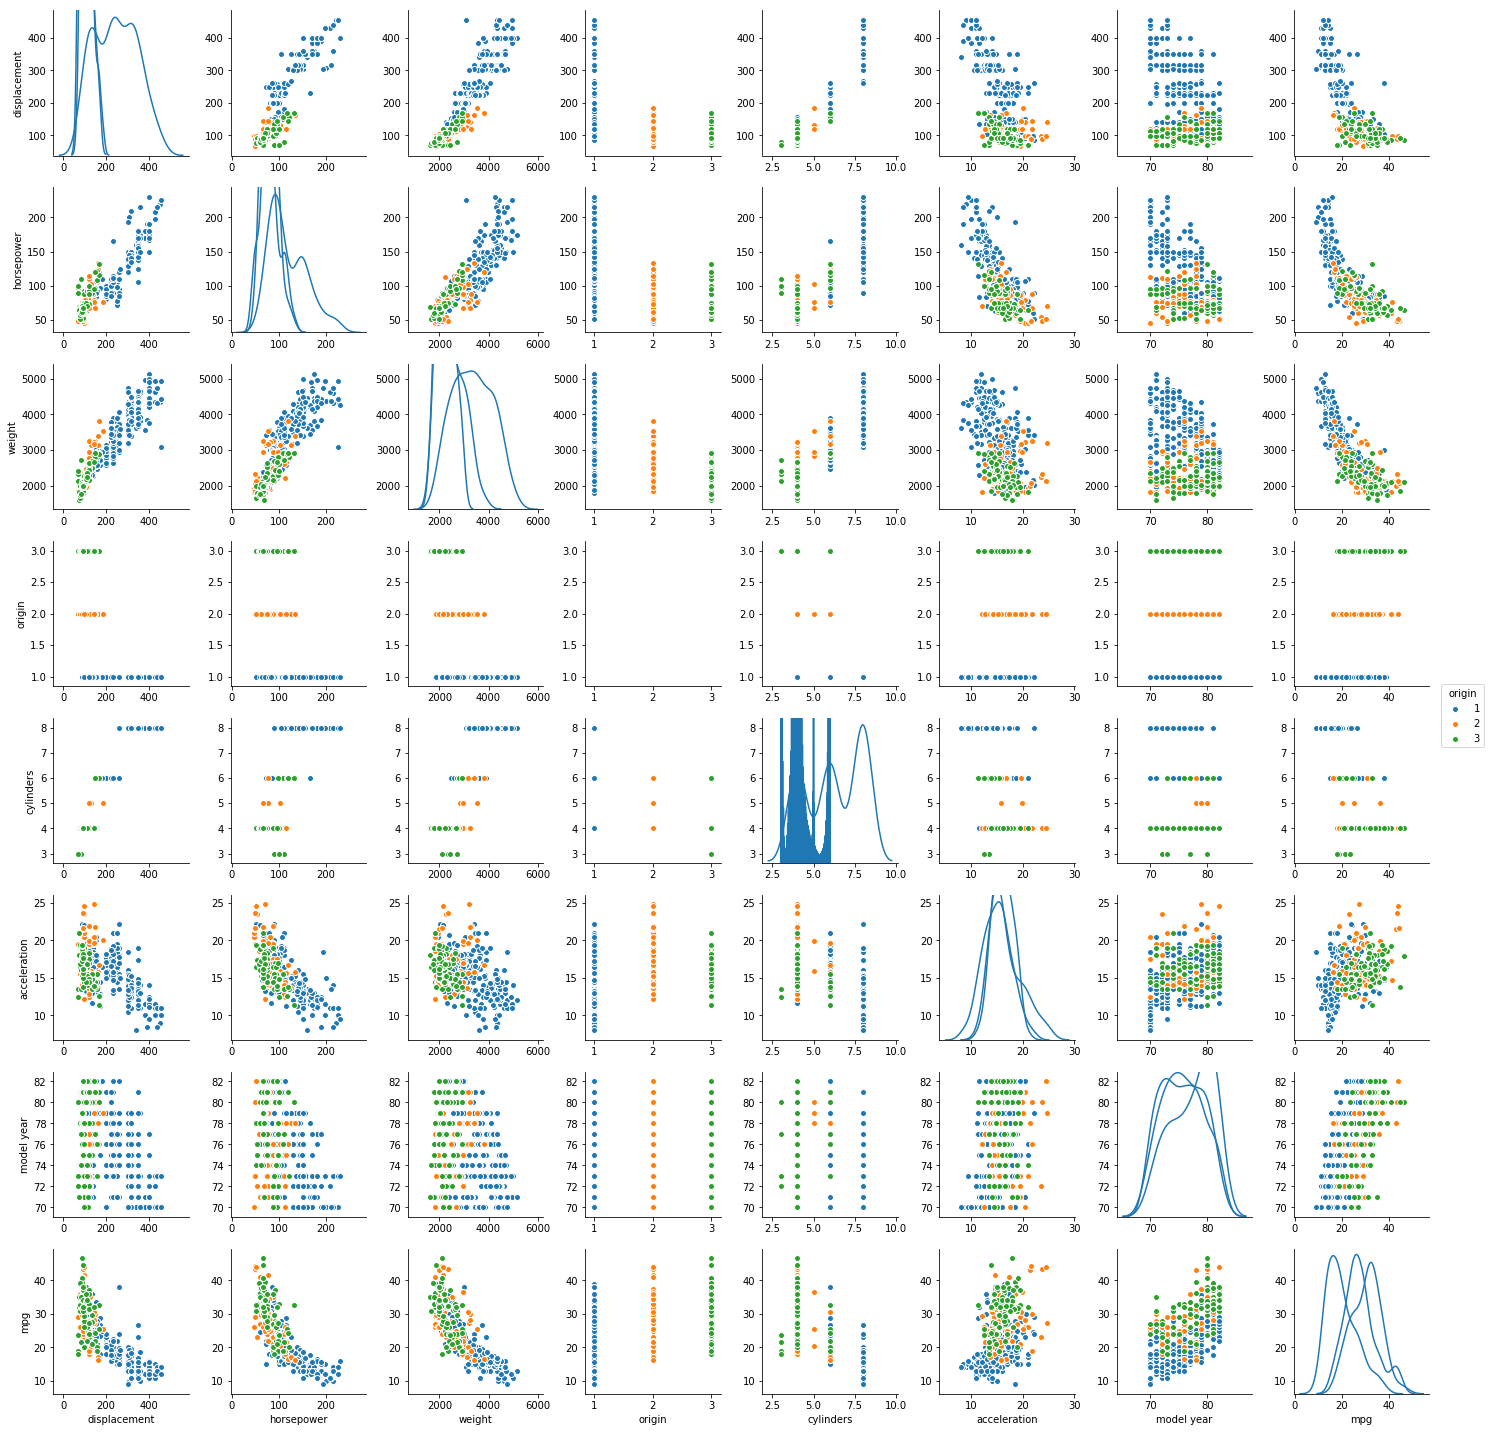

In [14]:
#Plotting a Pair Plot 
features =['displacement', 'horsepower', 'weight','origin','cylinders','acceleration','model year','mpg']
sns.pairplot(auto[features],hue='origin',diag_kind='kde')

In [15]:
#Checking dtypes once again to confirm predictor variables are correct type
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
brand            object
model            object
dtype: object

<span style="font-family: 'Bebas Neue'; font-size: 2em;">
Linear Regression </span>

<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
 Starting Linear Regression with Forward Feature Selection 
 Round 1 : individual variables</span>

In [16]:
#Code Reference: https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg

In [17]:
#Defining factors to predict mpg
factors1 = ['cylinders']
X1 = pd.DataFrame(auto[factors1].copy())
y1 = auto['mpg'].copy()
#Scaling
X1 = StandardScaler().fit_transform(X1)
#Split into test and train sets
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size = 0.33,random_state=1)
X1_train.shape[0] == y1_train.shape[0]

True

In [18]:
regr=LR()
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [19]:
regr.fit(X1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
#Predicting
y1_predicted = regr.predict(X1_test)
#Calculating RMSE and R-squared of test data vs predicted data
rmse1 = sqrt(mean_squared_error(y_true=y1_test,y_pred=y1_predicted))
rmse1
r2 = r2_score(y1_test,y1_predicted)
print(rmse1,r2)

4.618091275819769 0.639270470503


In [21]:
factors2 = ['displacement']
X2 = pd.DataFrame(auto[factors2].copy())
y2 = auto['mpg'].copy()

X2 = StandardScaler().fit_transform(X2)

X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size = 0.33,random_state=1)
X2_train.shape[0] == y2_train.shape[0]

regr.get_params()
regr.fit(X2_train,y2_train)
y2_predicted = regr.predict(X2_test)

rmse2 = sqrt(mean_squared_error(y_true=y2_test,y_pred=y2_predicted))
r2 = r2_score(y2_test,y2_predicted)
print(rmse2,r2)

4.284701648664034 0.689474089597


In [22]:
factors3 = ['horsepower']
X3 = pd.DataFrame(auto[factors3].copy())
y3 = auto['mpg'].copy()

X3 = StandardScaler().fit_transform(X3)

X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size = 0.33,random_state=1)
X3_train.shape[0] == y3_train.shape[0]

regr.get_params()
regr.fit(X3_train,y3_train)
y3_predicted = regr.predict(X3_test)

rmse3 = sqrt(mean_squared_error(y_true=y3_test,y_pred=y3_predicted))
rmse3
r2 = r2_score(y3_test,y3_predicted)
print(rmse3,r2)

4.651546692310375 0.634024982668


In [23]:
factors4 = ['weight']
X4 = pd.DataFrame(auto[factors4].copy())
y4 = auto['mpg'].copy()

X4 = StandardScaler().fit_transform(X4)

X4_train,X4_test,y4_train,y4_test=train_test_split(X4,y4,test_size = 0.33,random_state=1)
X4_train.shape[0] == y4_train.shape[0]

regr.get_params()
regr.fit(X4_train,y4_train)
y4_predicted = regr.predict(X4_test)

rmse4 = sqrt(mean_squared_error(y_true=y4_test,y_pred=y4_predicted))
rmse4
r2 = r2_score(y4_test,y4_predicted)
print(rmse4,r2)

3.9657386366664547 0.733985783273


In [24]:
factors5 = ['acceleration']
X5 = pd.DataFrame(auto[factors5].copy())
y5 = auto['mpg'].copy()

X5 = StandardScaler().fit_transform(X5)

X5_train,X5_test,y5_train,y5_test=train_test_split(X5,y5,test_size = 0.33,random_state=1)
X5_train.shape[0] == y5_train.shape[0]

regr.get_params()
regr.fit(X5_train,y5_train)
y5_predicted = regr.predict(X5_test)

rmse5 = sqrt(mean_squared_error(y_true=y5_test,y_pred=y5_predicted))
rmse5
r2 = r2_score(y5_test,y5_predicted)
print(rmse5,r2)

6.848199183734168 0.206751174791


In [25]:
factors6 = ['model year']
X6 = pd.DataFrame(auto[factors6].copy())
y6 = auto['mpg'].copy()

X6 = StandardScaler().fit_transform(X6)

X6_train,X6_test,y6_train,y6_test=train_test_split(X6,y6,test_size = 0.33,random_state=1)
X6_train.shape[0] == y6_train.shape[0]

regr.get_params()
regr.fit(X6_train,y6_train)
y6_predicted = regr.predict(X6_test)

rmse6 = sqrt(mean_squared_error(y_true=y6_test,y_pred=y6_predicted))
rmse6
r2 = r2_score(y6_test,y6_predicted)
print(rmse6,r2)

6.06318006782531 0.378190141645


In [26]:
factors7 = ['origin']
X7 = pd.DataFrame(auto[factors7].copy())
y7 = auto['mpg'].copy()

X7 = StandardScaler().fit_transform(X7)

X7_train,X7_test,y7_train,y7_test=train_test_split(X7,y7,test_size = 0.33,random_state=1)
X7_train.shape[0] == y7_train.shape[0]

regr.get_params()
regr.fit(X7_train,y7_train)
y7_predicted = regr.predict(X7_test)

rmse7 = sqrt(mean_squared_error(y_true=y7_test,y_pred=y7_predicted))
rmse7
r2 = r2_score(y7_test,y7_predicted)
print(rmse7,r2)

5.851527194127615 0.420844578873


<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
Round 2 of Forward Feature Selection: Combining the best variable from Round 1 (lowest RMSE) with a second variable </span>

In [27]:
factors8 = ['weight', 'cylinders']
X8 = pd.DataFrame(auto[factors8].copy())
y8 = auto['mpg'].copy()

X8 = StandardScaler().fit_transform(X8)

X8_train,X8_test,y8_train,y8_test=train_test_split(X8,y8,test_size = 0.33,random_state=1)
X8_train.shape[0] == y8_train.shape[0]

regr.get_params()
regr.fit(X8_train,y8_train)
y8_predicted = regr.predict(X8_test)

rmse8 = sqrt(mean_squared_error(y_true=y8_test,y_pred=y8_predicted))
rmse8
r2 = r2_score(y8_test,y8_predicted)
print(rmse8,r2)

3.9309561036070604 0.738631612342


In [28]:
factors9 = ['weight', 'displacement']
X9 = pd.DataFrame(auto[factors9].copy())
y9 = auto['mpg'].copy()

X9 = StandardScaler().fit_transform(X9)

X9_train,X9_test,y9_train,y9_test=train_test_split(X9,y9,test_size = 0.33,random_state=1)
X9_train.shape[0] == y9_train.shape[0]

regr.get_params()
regr.fit(X9_train,y9_train)
y9_predicted = regr.predict(X9_test)

rmse9 = sqrt(mean_squared_error(y_true=y9_test,y_pred=y9_predicted))
rmse9
r2 = r2_score(y9_test,y9_predicted)
print(rmse9,r2)

3.892086206149341 0.743774958385


In [29]:
factors10 = ['weight', 'horsepower']
X10 = pd.DataFrame(auto[factors10].copy())
y10 = auto['mpg'].copy()

X10 = StandardScaler().fit_transform(X10)

X10_train,X10_test,y10_train,y10_test=train_test_split(X10,y10,test_size = 0.33,random_state=1)
X10_train.shape[0] == y10_train.shape[0]

regr.get_params()
regr.fit(X10_train,y10_train)
y10_predicted = regr.predict(X10_test)

rmse10 = sqrt(mean_squared_error(y_true=y10_test,y_pred=y10_predicted))
rmse10
r2 = r2_score(y10_test,y10_predicted)
print(rmse10,r2)

3.84726898799603 0.749641826767


In [30]:
factors11 = ['weight', 'acceleration']
X11 = pd.DataFrame(auto[factors11].copy())
y11 = auto['mpg'].copy()

X11 = StandardScaler().fit_transform(X11)

X11_train,X11_test,y11_train,y11_test=train_test_split(X11,y11,test_size = 0.33,random_state=1)
X11_train.shape[0] == y11_train.shape[0]

regr.get_params()
regr.fit(X11_train,y11_train)
y11_predicted = regr.predict(X11_test)

rmse11 = sqrt(mean_squared_error(y_true=y11_test,y_pred=y11_predicted))
rmse11
r2 = r2_score(y11_test,y11_predicted)
print(rmse11,r2)

3.900334441555429 0.742687806793


In [31]:
factors12 = ['weight', 'model year']
X12 = pd.DataFrame(auto[factors12].copy())
y12 = auto['mpg'].copy()

X12 = StandardScaler().fit_transform(X12)

X12_train,X12_test,y12_train,y12_test=train_test_split(X12,y12,test_size = 0.33,random_state=1)
X12_train.shape[0] == y12_train.shape[0]

regr.get_params()
regr.fit(X12_train,y12_train)
y12_predicted = regr.predict(X12_test)

rmse12 = sqrt(mean_squared_error(y_true=y12_test,y_pred=y12_predicted))
rmse12
r2 = r2_score(y12_test,y12_predicted)
print(rmse12,r2)

3.0848659845043622 0.839035807946


In [32]:
factors13 = ['weight', 'origin']
X13 = pd.DataFrame(auto[factors13].copy())
y13 = auto['mpg'].copy()

X13 = StandardScaler().fit_transform(X13)

X13_train,X13_test,y13_train,y13_test=train_test_split(X13,y13,test_size = 0.33,random_state=1)
X13_train.shape[0] == y13_train.shape[0]

regr.get_params()
regr.fit(X13_train,y13_train)
y13_predicted = regr.predict(X13_test)

rmse13 = sqrt(mean_squared_error(y_true=y13_test,y_pred=y13_predicted))
rmse13
r2 = r2_score(y13_test,y13_predicted)
print(rmse13,r2)

3.8311426717147987 0.75173624416


<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
Round 3: 3 variables - starting with the best feature from Round 2 </span>

In [33]:
factors14 = ['weight', 'model year', 'cylinders']
X14 = pd.DataFrame(auto[factors14].copy())
y14 = auto['mpg'].copy()

X14 = StandardScaler().fit_transform(X14)

X14_train,X14_test,y14_train,y14_test=train_test_split(X14,y14,test_size = 0.33,random_state=1)
X14_train.shape[0] == y14_train.shape[0]

regr.get_params()
regr.fit(X14_train,y14_train)
y14_predicted = regr.predict(X14_test)

rmse14 = sqrt(mean_squared_error(y_true=y14_test,y_pred=y14_predicted))
rmse14
r2 = r2_score(y14_test,y14_predicted)
print(rmse14,r2)

3.0879575636329926 0.83871301733


In [34]:
factors15 = ['weight', 'model year', 'displacement']
X15 = pd.DataFrame(auto[factors15].copy())
y15 = auto['mpg'].copy()

X15 = StandardScaler().fit_transform(X15)

X15_train,X15_test,y15_train,y15_test=train_test_split(X15,y15,test_size = 0.33,random_state=1)
X15_train.shape[0] == y15_train.shape[0]

regr.get_params()
regr.fit(X15_train,y15_train)
y15_predicted = regr.predict(X15_test)

rmse15 = sqrt(mean_squared_error(y_true=y15_test,y_pred=y15_predicted))
rmse15
r2 = r2_score(y15_test,y15_predicted)
print(rmse15,r2)

3.100317797801715 0.837419259476


In [35]:
factors16 = ['weight', 'model year', 'horsepower']
X16 = pd.DataFrame(auto[factors16].copy())
y16 = auto['mpg'].copy()

X16 = StandardScaler().fit_transform(X16)

X16_train,X16_test,y16_train,y16_test=train_test_split(X16,y16,test_size = 0.33,random_state=1)
X16_train.shape[0] == y16_train.shape[0]

regr.get_params()
regr.fit(X16_train,y16_train)
y16_predicted = regr.predict(X16_test)

rmse16 = sqrt(mean_squared_error(y_true=y16_test,y_pred=y16_predicted))
rmse16
r2 = r2_score(y16_test,y16_predicted)
print(rmse16,r2)

3.091833769413819 0.838307847307


In [36]:
factors17 = ['weight', 'model year', 'acceleration']
X17 = pd.DataFrame(auto[factors17].copy())
y17 = auto['mpg'].copy()

X17 = StandardScaler().fit_transform(X17)

X17_train,X17_test,y17_train,y17_test=train_test_split(X17,y17,test_size = 0.33,random_state=1)
X17_train.shape[0] == y17_train.shape[0]

regr.get_params()
regr.fit(X17_train,y17_train)
y17_predicted = regr.predict(X17_test)

rmse17 = sqrt(mean_squared_error(y_true=y17_test,y_pred=y17_predicted))
rmse17
r2 = r2_score(y17_test,y17_predicted)
print(rmse17,r2)

3.0789293901533954 0.839654738977


In [37]:
factors18 = ['weight', 'model year', 'origin']
X18 = pd.DataFrame(auto[factors18].copy())
y18 = auto['mpg'].copy()

X18 = StandardScaler().fit_transform(X18)

X18_train,X18_test,y18_train,y18_test=train_test_split(X18,y18,test_size = 0.33,random_state=1)
X18_train.shape[0] == y18_train.shape[0]

regr.get_params()
regr.fit(X18_train,y18_train)
y18_predicted = regr.predict(X18_test)

rmse18 = sqrt(mean_squared_error(y_true=y18_test,y_pred=y18_predicted))
rmse18
r2=r2_score(y18_test,y18_predicted)
print(rmse18, r2)

2.9259661389073286 0.855191097427


<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
Round 4: 4 variables - starting with the best feature from Round 3</span>

In [38]:
factors19 = ['weight', 'model year', 'origin', 'cylinders']
X19 = pd.DataFrame(auto[factors19].copy())
y19 = auto['mpg'].copy()

X19 = StandardScaler().fit_transform(X19)

X19_train,X19_test,y19_train,y19_test=train_test_split(X19,y19,test_size = 0.33,random_state=1)
X19_train.shape[0] == y19_train.shape[0]

regr.get_params()
regr.fit(X19_train,y19_train)
y19_predicted = regr.predict(X19_test)

rmse19 = sqrt(mean_squared_error(y_true=y19_test,y_pred=y19_predicted))
r2=r2_score(y19_test,y19_predicted)
print(rmse19,r2)

2.9308026132573204 0.85471197816


In [39]:
factors20 = ['weight', 'model year', 'origin', 'displacement']
X20 = pd.DataFrame(auto[factors20].copy())
y20 = auto['mpg'].copy()

X20 = StandardScaler().fit_transform(X20)

X20_train,X20_test,y20_train,y20_test=train_test_split(X20,y20,test_size = 0.33,random_state=1)
X20_train.shape[0] == y20_train.shape[0]

regr.get_params()
regr.fit(X20_train,y20_train)
y20_predicted = regr.predict(X20_test)

rmse20 = sqrt(mean_squared_error(y_true=y20_test,y_pred=y20_predicted))
rmse20
r2 = r2_score(y20_test,y20_predicted)
print(rmse20,r2)

2.9390582459294707 0.85389231609


In [40]:
factors21 = ['weight', 'model year', 'origin', 'horsepower']
X21 = pd.DataFrame(auto[factors21].copy())
y21 = auto['mpg'].copy()

X21 = StandardScaler().fit_transform(X21)

X21_train,X21_test,y21_train,y21_test=train_test_split(X21,y21,test_size = 0.33,random_state=1)
X21_train.shape[0] == y21_train.shape[0]

regr.get_params()
regr.fit(X21_train,y21_train)
y21_predicted = regr.predict(X21_test)

rmse21 = sqrt(mean_squared_error(y_true=y21_test,y_pred=y21_predicted))
rmse21
r2 = r2_score(y21_test,y21_predicted)
print(rmse21,r2)

2.9325126407014395 0.854542387084


In [41]:
factors22 = ['weight', 'model year', 'origin', 'acceleration']
X22 = pd.DataFrame(auto[factors22].copy())
y22 = auto['mpg'].copy()

X22 = StandardScaler().fit_transform(X22)

X22_train,X22_test,y22_train,y22_test=train_test_split(X22,y22,test_size = 0.33,random_state=1)
X22_train.shape[0] == y22_train.shape[0]

regr.get_params()
regr.fit(X22_train,y22_train)
y22_predicted = regr.predict(X22_test)

rmse22 = sqrt(mean_squared_error(y_true=y22_test,y_pred=y22_predicted))
rmse22
r2 = r2_score(y22_test,y22_predicted)
print(rmse22,r2)

2.9155799266560454 0.856217320252


<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
Round 5: 5 variables - starting with the best feature from Round 4 </span>

In [42]:
factors23 = ['weight', 'model year', 'origin', 'acceleration', 'cylinders']
X23 = pd.DataFrame(auto[factors23].copy())
y23 = auto['mpg'].copy()

X23 = StandardScaler().fit_transform(X23)

X23_train,X23_test,y23_train,y23_test=train_test_split(X23,y23,test_size = 0.33,random_state=1)
X23_train.shape[0] == y23_train.shape[0]

regr.get_params()
regr.fit(X23_train,y23_train)
y23_predicted = regr.predict(X23_test)

rmse23 = sqrt(mean_squared_error(y_true=y23_test,y_pred=y23_predicted))
rmse23
r2=r2_score(y23_test,y23_predicted)
print(rmse23,r2)

2.92108726101938 0.855673615605


In [43]:
factors24 = ['weight', 'model year', 'origin', 'acceleration', 'displacement']
X24 = pd.DataFrame(auto[factors24].copy())
y24 = auto['mpg'].copy()

X24 = StandardScaler().fit_transform(X24)

X24_train,X24_test,y24_train,y24_test=train_test_split(X24,y24,test_size = 0.33,random_state=1)
X24_train.shape[0] == y24_train.shape[0]

regr.get_params()
regr.fit(X24_train,y24_train)
y24_predicted = regr.predict(X24_test)

rmse24 = sqrt(mean_squared_error(y_true=y24_test,y_pred=y24_predicted))
rmse24
r2 = r2_score(y24_test,y24_predicted)
print(rmse24,r2)

2.9189619931041215 0.85588355158


In [44]:
factors25 = ['weight', 'model year', 'origin', 'acceleration', 'horsepower']
X25 = pd.DataFrame(auto[factors25].copy())
y25 = auto['mpg'].copy()

X25 = StandardScaler().fit_transform(X25)

X25_train,X25_test,y25_train,y25_test=train_test_split(X25,y25,test_size = 0.33,random_state=1)
X25_train.shape[0] == y25_train.shape[0]

regr.get_params()
regr.fit(X25_train,y25_train)
y25_predicted = regr.predict(X25_test)

rmse25 = sqrt(mean_squared_error(y_true=y25_test,y_pred=y25_predicted))
rmse25
r2 = r2_score(y25_test,y25_predicted)
print(rmse25,r2)

2.9371939874741533 0.854077610886


<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
Round 6: 6 variables - starting with the best feature from Round 5 </span>

In [45]:
factors26 = ['weight', 'model year', 'origin', 'acceleration', 'displacement', 'cylinders']
X26 = pd.DataFrame(auto[factors26].copy())
y26 = auto['mpg'].copy()

X26 = StandardScaler().fit_transform(X26)

X26_train,X26_test,y26_train,y26_test=train_test_split(X26,y26,test_size = 0.33,random_state=1)
X26_train.shape[0] == y26_train.shape[0]

regr.get_params()
regr.fit(X26_train,y26_train)
y26_predicted = regr.predict(X26_test)

rmse26 = sqrt(mean_squared_error(y_true=y26_test,y_pred=y26_predicted))
rmse26
r2 = r2_score(y26_test,y26_predicted)
print(rmse26,r2)

2.9169405316368877 0.856083091672


In [46]:
factors27 = ['weight', 'model year', 'origin', 'acceleration','displacement', 'horsepower']
X27 = pd.DataFrame(auto[factors27].copy())
y27 = auto['mpg'].copy()

X27 = StandardScaler().fit_transform(X27)

X27_train,X27_test,y27_train,y27_test=train_test_split(X27,y27,test_size = 0.33,random_state=1)
X27_train.shape[0] == y27_train.shape[0]

regr.get_params()
regr.fit(X27_train,y27_train)
y27_predicted = regr.predict(X27_test)

rmse27 = sqrt(mean_squared_error(y_true=y27_test,y_pred=y27_predicted))
rmse27
r2 = r2_score(y27_test,y27_predicted)
print(rmse27,r2)

2.939945334888448 0.853804104111


<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
Round 7: Final round with all 7 variables - with the best feature from Round 6 </span>

In [47]:
factors28 = ['weight', 'model year', 'origin', 'acceleration', 'displacement','cylinders', 'horsepower']
X28 = pd.DataFrame(auto[factors28].copy())
y28 = auto['mpg'].copy()

X28 = StandardScaler().fit_transform(X28)

X28_train,X28_test,y28_train,y28_test=train_test_split(X28,y28,test_size = 0.33,random_state=1)
X28_train.shape[0] == y28_train.shape[0]

regr.get_params()
regr.fit(X28_train,y28_train)
y28_predicted = regr.predict(X28_test)

#Listing the regression coefficients, r-square and the rmse
for e in sorted (list(zip(list(factors28), regr.coef_)),
                key = lambda e: -abs(e[1])):
    print('\t{}: {:.3f}'.format(e[0], e[1]))
rmse28 = sqrt(mean_squared_error(y_true=y28_test,y_pred=y28_predicted))
r2 = r2_score(y28_test,y28_predicted)
print(rmse28,r2)

	weight: -5.819
	model year: 2.883
	displacement: 2.579
	origin: 1.027
	horsepower: -0.995
	cylinders: -0.799
	acceleration: 0.123
2.927363822710799 0.85505271893


In [48]:
#Code Reference: https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/
#Listing the Coefficients 
coef_df = pd.DataFrame()
coef_df = coef_df.append(pd.DataFrame({'varname': factors28,
                                       'coef': regr.coef_
                                          })
                            )
coef_df=coef_df.sort_values(coef_df.columns[0])
coef_df

,coef,varname
0,-5.818801,weight
6,-0.994532,horsepower
5,-0.798712,cylinders
3,0.122900,acceleration
2,1.026847,origin
4,2.578952,displacement
1,2.882681,model year


Text(0.5,0,'')

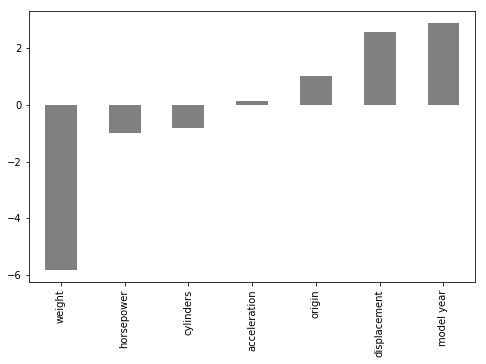

In [49]:
#Plotting the coefficients
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='grey', 
             legend=False)
ax.set_ylabel('')
ax.set_xlabel('')

<span style="font-family: 'Bebas Neue'; font-size: 2em;">
LR, Ridge, Lasso and ElasticNet </span>

In [50]:
#Trying Linear Regression with Robust Scalar
#Using all 7 attributes as factors for the rest of the methods
factors = ['weight', 'model year', 'origin', 'acceleration', 'displacement','cylinders', 'horsepower']
X = pd.DataFrame(auto[factors].copy())
y = auto['mpg'].copy()

X = RobustScaler().fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=1)
X_train.shape[0] == y_train.shape[0]

regr.get_params()
regr.fit(X_train,y_train)
y_predicted = regr.predict(X_test)

rmse={}
rsquare={}
rmse["LR"] = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rsquare["LR"]=r2_score(y_test, y_predicted)
print(rmse["LR"],rsquare["LR"])

2.9273638227107996 0.85505271893


<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
Ridge Regression </span>

In [51]:
#Ridge Regression
#Code Reference:https://gigadom.wordpress.com/2017/10/20/practical-machine-learning-with-r-and-python-part-3/
#Trying Ridge with all features

from sklearn.linear_model import Ridge
X_train.shape[0] == y_train.shape[0]
# Fit a ridge regression with alpha=20
ridge = Ridge(alpha=0.2).fit(X_train, y_train)
y_predicted=ridge.predict(X_test)
rmse["Ridge"]=sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rsquare["Ridge"]=r2_score(y_test,y_predicted)
print(rmse,rsquare)
# Print the training R squared
print('R-squared score (training): {:.3f}'.format(ridge.score(X_train, y_train)))
# Print the test Rsquared
print('R-squared score (test): {:.3f}'.format(ridge.score(X_test, y_test)))
print('Number of non-zero features: {}'.format(np.sum(ridge.coef_ != 0)))
#Printing Coefficients
coef_df = pd.DataFrame()
coef_df = coef_df.append(pd.DataFrame({'varname': factors,
                                       'coef': ridge.coef_
                                          })
                            )
coef_df=coef_df.sort_values(coef_df.columns[0])
coef_df

{'LR': 2.9273638227107996, 'Ridge': 2.922007808410352} {'LR': 0.85505271893027812, 'Ridge': 0.85558263563835713}
R-squared score (training): 0.804
R-squared score (test): 0.856
Number of non-zero features: 7


,coef,varname
0,-9.255838,weight
5,-1.681794,cylinders
6,-1.347434,horsepower
3,0.108965,acceleration
2,1.265750,origin
4,3.542230,displacement
1,4.658038,model year


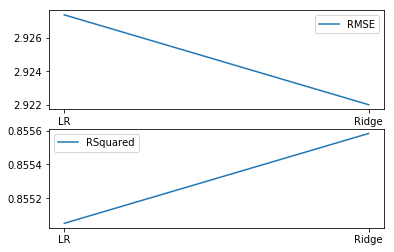

{'LR': 2.9273638227107996, 'Ridge': 2.922007808410352} {'LR': 0.85505271893027812, 'Ridge': 0.85558263563835713}


In [52]:
#Plotting comparison between LR & Ridge methods
fig=plt.subplots()
list1 = sorted(rmse.items()) # sorted by key, return a list of tuples
list2 = sorted(rsquare.items())
x, y = zip(*list1) # unpack a list of pairs into two tuples
plt.subplot(211)
plt.plot(x, y,label="RMSE")
plt.legend()
x, y = zip(*list2)
plt.subplot(212)
plt.plot(x, y,label="RSquared")
plt.legend()
plt.show()
print(rmse,rsquare)

<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
Lasso Regression </span>

In [53]:
#Trying Lasso with all features

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.07, max_iter = 10).fit(X_train, y_train)
y_predicted=lasso.predict(X_test)

rmse["Lasso"]=sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rsquare["Lasso"]=r2_score(y_test,y_predicted)

print('Non-zero features: {}'.format(np.sum(lasso.coef_ != 0)))
print('R-squared score (training): {:.3f}' .format(lasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n' .format(lasso.score(X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')
#Printing coefficients
coef_df = pd.DataFrame()
coef_df = coef_df.append(pd.DataFrame({'varname': factors,
                                       'coef': lasso.coef_
                                          })
                            )
coef_df=coef_df.sort_values(coef_df.columns[0])
coef_df

Non-zero features: 5
R-squared score (training): 0.799
R-squared score (test): 0.856

Features with non-zero weight (sorted by absolute magnitude):


C:\Users\Rani\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,coef,varname
0,-8.140026,weight
6,-0.369047,horsepower
4,-0.000000,displacement
5,-0.000000,cylinders
3,0.095791,acceleration
2,0.857324,origin
1,4.460839,model year


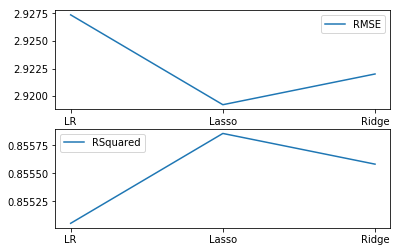

{'LR': 2.9273638227107996, 'Ridge': 2.922007808410352, 'Lasso': 2.919224901102137} {'LR': 0.85505271893027812, 'Ridge': 0.85558263563835713, 'Lasso': 0.85585758956120561}


In [54]:
#Plotting comparisons of LR, Ridge & Lasso methods
fig=plt.subplots()
list1 = sorted(rmse.items()) # sorted by key, return a list of tuples
list2 = sorted(rsquare.items())
x, y = zip(*list1) # unpack a list of pairs into two tuples
plt.subplot(211)
plt.plot(x, y,label="RMSE")
plt.legend()
x, y = zip(*list2)
plt.subplot(212)
plt.plot(x, y,label="RSquared")
plt.legend()
plt.show()
print(rmse,rsquare)

<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
ElasticNet Regression </span>

In [55]:
#Trying ENet with all features

from sklearn.linear_model import ElasticNet

ENet = ElasticNet(alpha=0.0005, max_iter = 10).fit(X_train, y_train)
y_predicted=ENet.predict(X_test)
rmse["ENet"]=sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rsquare["ENet"]=r2_score(y_test,y_predicted)
print(rmse["ENet"],rsquare["ENet"])
print('Non-zero features: {}'.format(np.sum(ENet.coef_ != 0)))
print('R-squared score (training): {:.3f}' .format(ENet.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n' .format(ENet.score(X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')
#Printing Coefficients
coef_df = pd.DataFrame()
coef_df = coef_df.append(pd.DataFrame({'varname': factors,
                                       'coef': ENet.coef_
                                          })
                            )
coef_df=coef_df.sort_values(coef_df.columns[0])
coef_df

2.910020543976751 0.85676512266
Non-zero features: 7
R-squared score (training): 0.803
R-squared score (test): 0.857

Features with non-zero weight (sorted by absolute magnitude):


C:\Users\Rani\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


,coef,varname
0,-9.230125,weight
5,-0.998947,cylinders
6,-0.808339,horsepower
3,0.206511,acceleration
2,1.134601,origin
4,2.403170,displacement
1,4.669796,model year


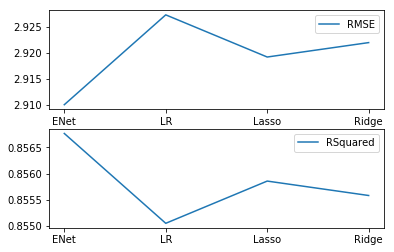

{'LR': 2.9273638227107996, 'Ridge': 2.922007808410352, 'Lasso': 2.919224901102137, 'ENet': 2.910020543976751} {'LR': 0.85505271893027812, 'Ridge': 0.85558263563835713, 'Lasso': 0.85585758956120561, 'ENet': 0.85676512266012161}


In [56]:
#Plotting comparisons of Enet with LR, Ridge & Lasso methods
fig=plt.subplots()
list1 = sorted(rmse.items()) # sorted by key, return a list of tuples
list2 = sorted(rsquare.items())
x, y = zip(*list1) # unpack a list of pairs into two tuples
plt.subplot(211)
plt.plot(x, y,label="RMSE")
plt.legend()
x, y = zip(*list2)
plt.subplot(212)
plt.plot(x, y,label="RSquared")
plt.legend()
plt.show()
print(rmse,rsquare)

<span style="font-family: 'Bebas Neue'; font-size: 2em;">
Ensemble by Average </span>

In [57]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error

In [58]:
#Code Reference:https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [59]:
averaged_models = AveragingModels(models = (ENet,lasso,ridge,regr))
averaged_models.fit(X_train, y_train)
average_pred = averaged_models.predict(X_test)
rmse["Ensemble_Avg"]=sqrt(mean_squared_error(y_true=y_test,y_pred=average_pred))
rsquare["Ensemble_Avg"]=r2_score(y_test, average_pred)
print(rmse,rsquare)

{'LR': 2.9273638227107996, 'Ridge': 2.922007808410352, 'Lasso': 2.919224901102137, 'ENet': 2.910020543976751, 'Ensemble_Avg': 2.9090243233894078} {'LR': 0.85505271893027812, 'Ridge': 0.85558263563835713, 'Lasso': 0.85585758956120561, 'ENet': 0.85676512266012161, 'Ensemble_Avg': 0.85686317633810882}


C:\Users\Rani\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


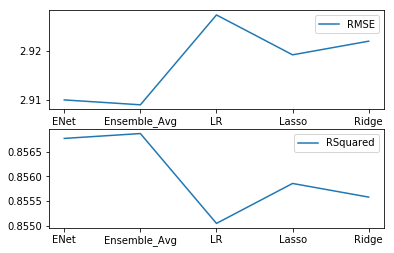

{'LR': 2.9273638227107996, 'Ridge': 2.922007808410352, 'Lasso': 2.919224901102137, 'ENet': 2.910020543976751, 'Ensemble_Avg': 2.9090243233894078} {'LR': 0.85505271893027812, 'Ridge': 0.85558263563835713, 'Lasso': 0.85585758956120561, 'ENet': 0.85676512266012161, 'Ensemble_Avg': 0.85686317633810882}


In [60]:
#Plotting comparisons of all 5 methods
fig=plt.subplots()
list1 = sorted(rmse.items()) # sorted by key, return a list of tuples
list2 = sorted(rsquare.items())
x, y = zip(*list1) # unpack a list of pairs into two tuples
plt.subplot(211)
plt.plot(x, y,label="RMSE")
plt.legend()
x, y = zip(*list2)
plt.subplot(212)
plt.plot(x, y,label="RSquared")
plt.legend()
plt.show()
print(rmse,rsquare)

Text(0,0.5,'Predicted mpg')

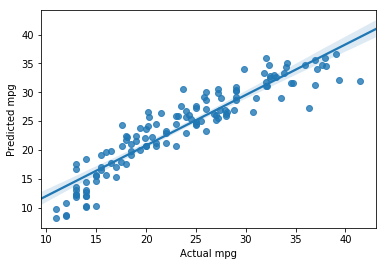

In [61]:
#Predicted Vs Actual mpg values for Ensemble Average
sns.regplot(y_test, average_pred)
plt.xlabel("Actual mpg")
plt.ylabel("Predicted mpg")

<span style="font-family: 'Bebas Neue'; font-size: 1.5em;">
---End--- 
</span>

In [62]:
#Code References:
#Exploratory Analysis
#https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg
#https://www.kaggle.com/pravinwagh/exploratory-data-analysis-auto-mpg
#https://github.com/aCombray/mpg/blob/master/Python_Homework7_YuechengZhu.ipynb
#==
#Linear Regression
#https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg
#===
#Coefficient Plotting
#https://zhiyzuo.github.io/Python-Plot-Regression-Coefficient/
#==
#Ridge & Lasso
#https://gigadom.wordpress.com/2017/10/20/practical-machine-learning-with-r-and-python-part-3/
#==
#Ensemble by Average
#https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard